# 딥러닝 구조 연습4-이미지

* 흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류하는 것입니다. 

## 라이브러리 로드

In [1]:
import numpy as np
from keras.datasets import mnist
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 데이터 로드

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000, 10))

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000, 10))

In [8]:
train_images.ndim


3

In [9]:
train_labels # 정수 라벨 인코딩이 진행된 상태

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
import numpy as np

np.unique(train_labels, return_counts=True)

(array([0., 1.], dtype=float32), array([540000,  60000], dtype=int64))

## 데이터 준비

In [15]:
train_images.shape

(60000, 28, 28)

In [14]:
#데이터 전처리
train_scaled =train_images/ 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28)

In [16]:
train_scaled.shape, train_labels.shape

((60000, 784), (60000, 10))

In [17]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
train_labels

array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       ...,

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]]], dtype=float32)

In [21]:
test_labels.shape

(10000, 10, 2)

In [20]:
test_images.shape

(10000, 28, 28)

## 딥러닝 구성하기

In [ ]:
# 훈련데이터 (전처리 완료상태)

## 딥러닝 설정하기

In [ ]:
#손실함수
#옵티마이저:경사하강법 종류
#평가방법

#함수로 만들기 
def model_fn(a_layer=None):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model



## 모델 최적화 설정

* 콜백: 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
* ModelCheckpoint(): 최상의 검증 점수를 만드는 그 때 당시의 가중치와 모델 구조를 저장
* EarlyStopping():검증 점수가 제일 낮을 때, 학습을 중단하여 과적합이 시작되기 전에 훈련을 미리 중지(자원 절약)




In [ ]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# ## 코랩을 사용할 때
# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

In [24]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

modelpath="./model/MNIST손글씨_dnn_model.hdf5"

#베스트모델 저장
#save_best_only=True : 검증점수의 성능이 향상 되었을 때만 저장


#검증점수를 모니터링하여 더 이상 성능이 향상되지 않으면 조기종료
#5번 연속 검증점수가 향상되지 않으면 훈련 중지



In [26]:
from tensorflow.keras.layers import Flatten,Dropout

## 딥러닝 훈련하기

In [27]:
# 128개 샘플씩 미니 배치로 훈련 데이터 다섯 번 반복

def model_fn():
    model = Sequential()
    model.add(Flatten(input_shape = (784,))) # reshape 대신 사용가능
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation = 'softmax'))
    return model



In [28]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)               

In [30]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
modelpath="./model/MNIST손글씨_dnn_model.hdf5"
#베스트모델 저장
#save_best_only=True : 검증점수의 성능이 향상 되었을 때만 저장
# label이 원핫 인코딩이 적용되어 있기 때문에 categorical_crossentropy를 적용해야 함.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

checkpoint_cb = ModelCheckpoint(filepath=modelpath,save_best_only=True)

#검증점수를 모니터링하여 더 이상 성능이 향상되지 않으면 조기종료
#5번 연속 검증점수가 향상되지 않으면 훈련 중지
early_stopping_cb = EarlyStopping(patience=5,restore_best_weights=True) # 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림.

history = model.fit(train_scaled, train_labels, epochs=100, verbose=1,
                    validation_data = 0.3,
                    callbacks=[checkpoint_cb, early_stopping_cb],
                    batch_size = 128)


Epoch 1/100


ValueError: in user code:

    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Python39\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Python39\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Python39\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Python39\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Python39\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 2) and (None, 10) are incompatible


In [ ]:
# 몇 번째 에포크에서 훈련이 중지 되었는지..
early_stopping_cb.stopped_epoch

## 평가하기

In [31]:
test_scaled = train_images/255.0 # 0~1 사이의 수로 정규화
test_scaled = train_scaled.reshape(-1,784)

model.evaluate(test_scaled, test_labels)

ValueError: Data cardinality is ambiguous:
  x sizes: 60000
  y sizes: 10000
Make sure all arrays contain the same number of samples.

테스트 세트의 정확도는 98.2%로 나왔습니다. 훈련 세트 정확도보다는 약간 낮습니다. 
약간의 과대적합이 보입니다. 

## 시각화하기

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 전체 코드

In [ ]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

## 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

---

## 진짜 내 손글씨 판단하기

* 28x28 픽셀 그림판 만들기 (가로 세로 비율 유지 체크 해제)
* 브러시로 숫자 쓰기
* 저장하기(png형태)

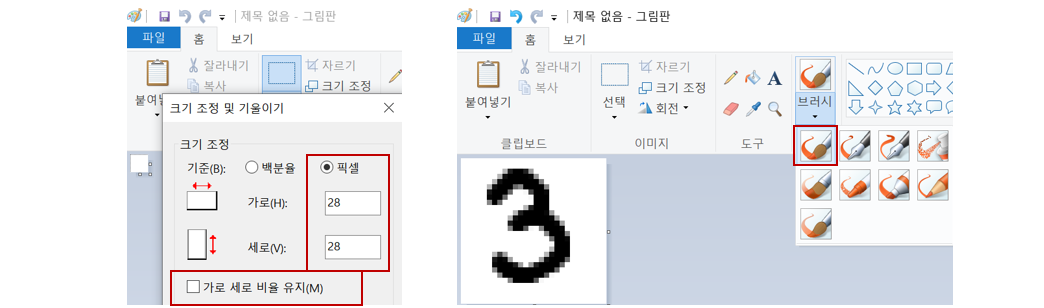

In [ ]:
from PIL import Image
Image.open("./image/3.png",)

In [ ]:
## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

In [ ]:
from keras.models import load_model
from keras.utils import np_utils
import matplotlib.pyplot as plt

# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# .png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("./image/3.png").convert('L')
plt.imshow(img)
plt.show()

# # # 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))

# # # 데이터를 모델에 적용할 수 있도록 가공
test_data = ((img / 255.0) - 1) * -1


In [ ]:
test_data

In [ ]:
# 모델을 다시 읽어서 예측을 해보자

from tensorflow.keras.models import load_model
model = load_model('./model/MNIST손글씨_dnn_model.hdf5') 

result = model.predict(test_data)